# Ajao - Promineo Tech Data Engineering Capstone Project

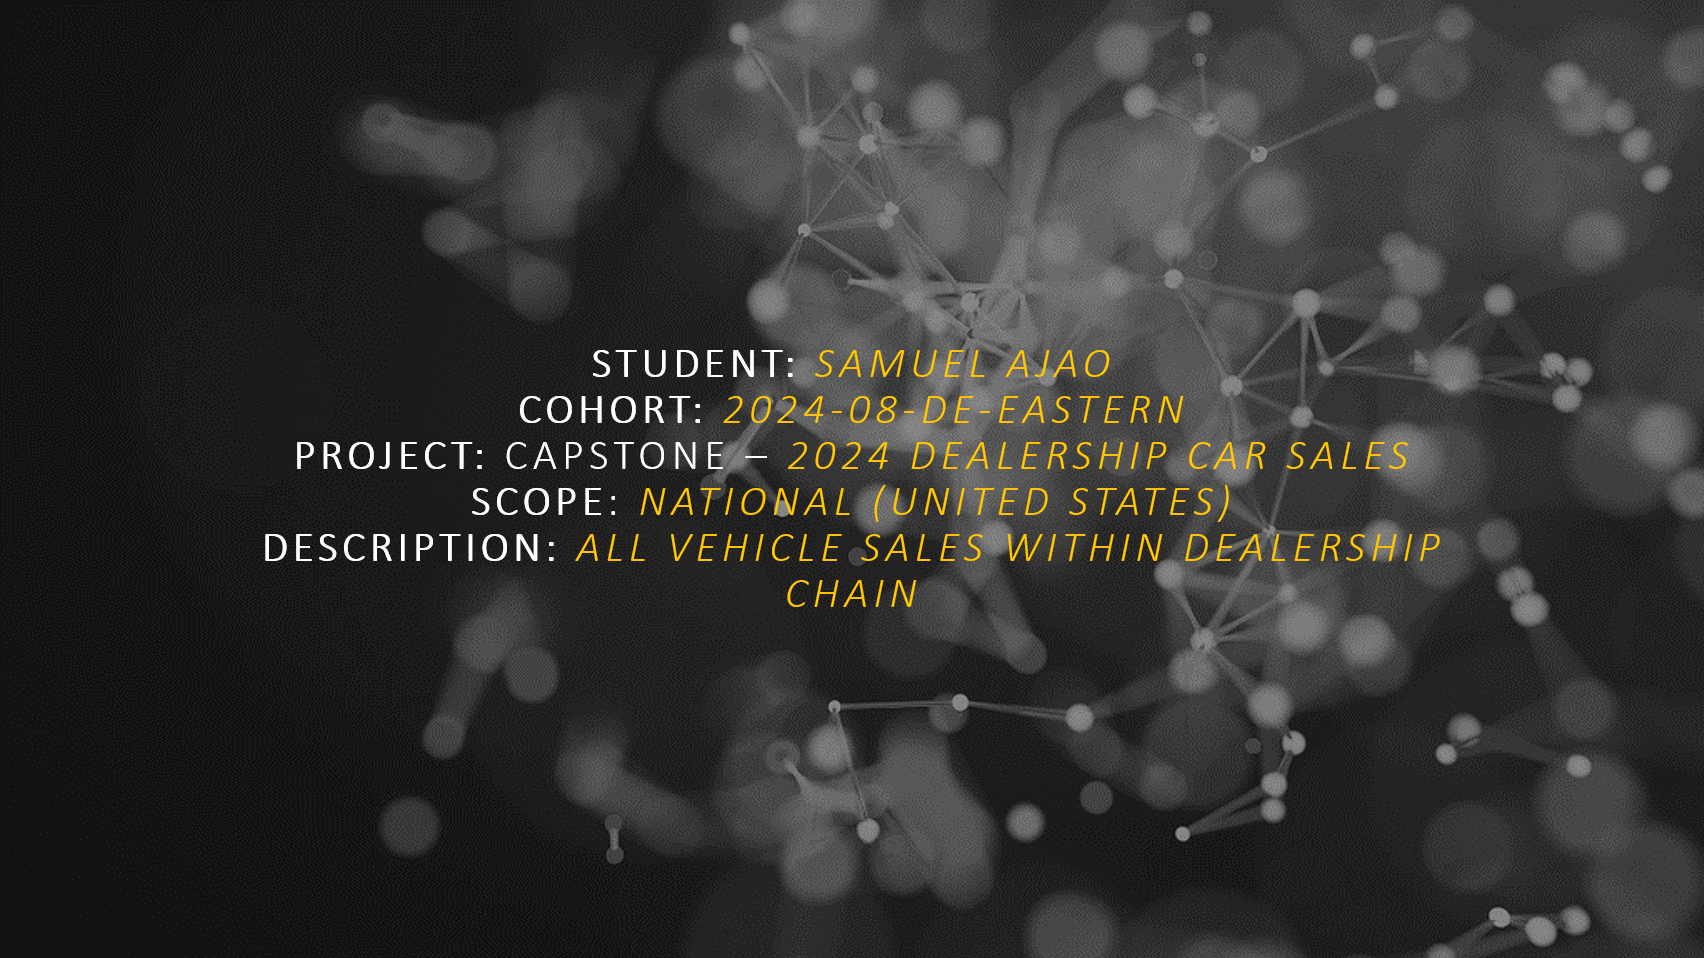

### Logical Entity Relationship Diagram

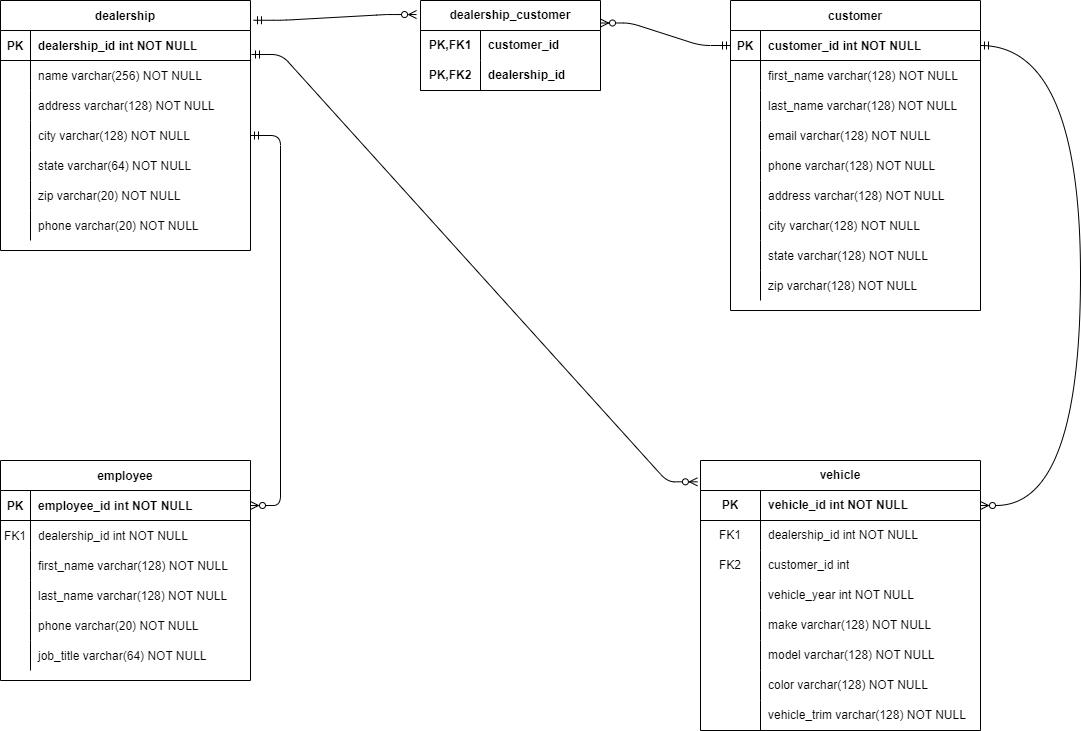

## DDL for Car Dealership Database

### DDL for dealership Table

### DDL for employee Table

### DDL for customer Table

### DDL for vehicle Table

### DDL for dealership_customer Join Table

### **Step 1: Set Up AWS S3**
1. **Create an S3 Bucket**:
2. **Upload Data to S3**:

**s3://pt-data-engineering-capstone/us-2024-carsales/USA_cars_datasets.csv**

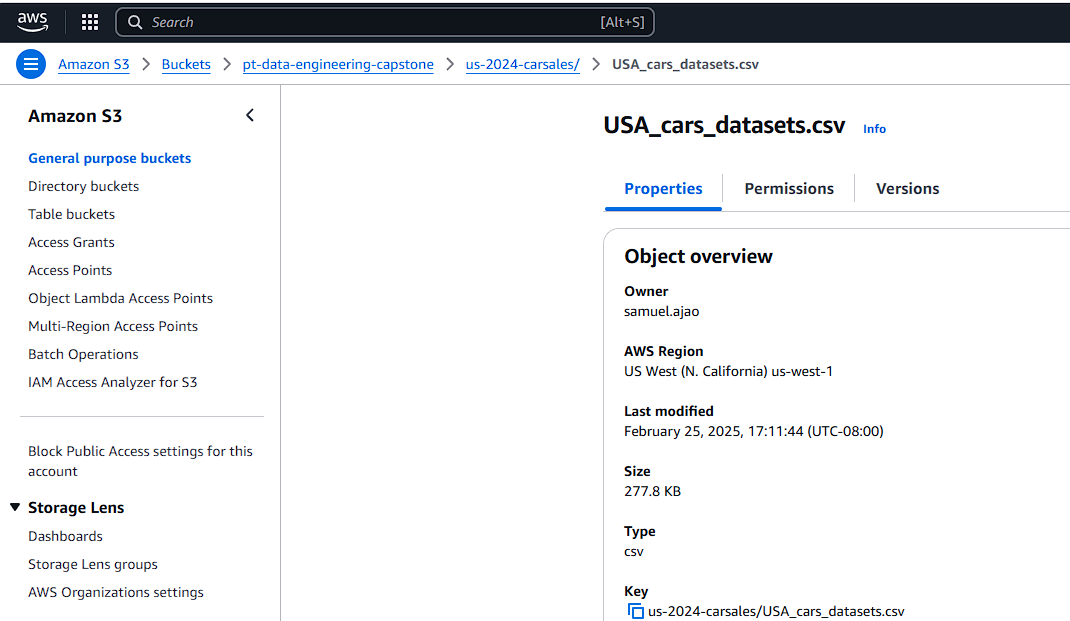

### **Step 2: Configure AWS Glue**
AWS Glue will crawl the S3 data and create a metadata catalog that Redshift can use.

1. **Create an IAM Role for Glue**:
   - Go to IAM in the AWS Console.
   - Create a role with policies like `AWSGlueServiceRole`, `AmazonS3FullAccess`, and `AmazonRedshiftFullAccess`.
   - Attach the role to Glue.


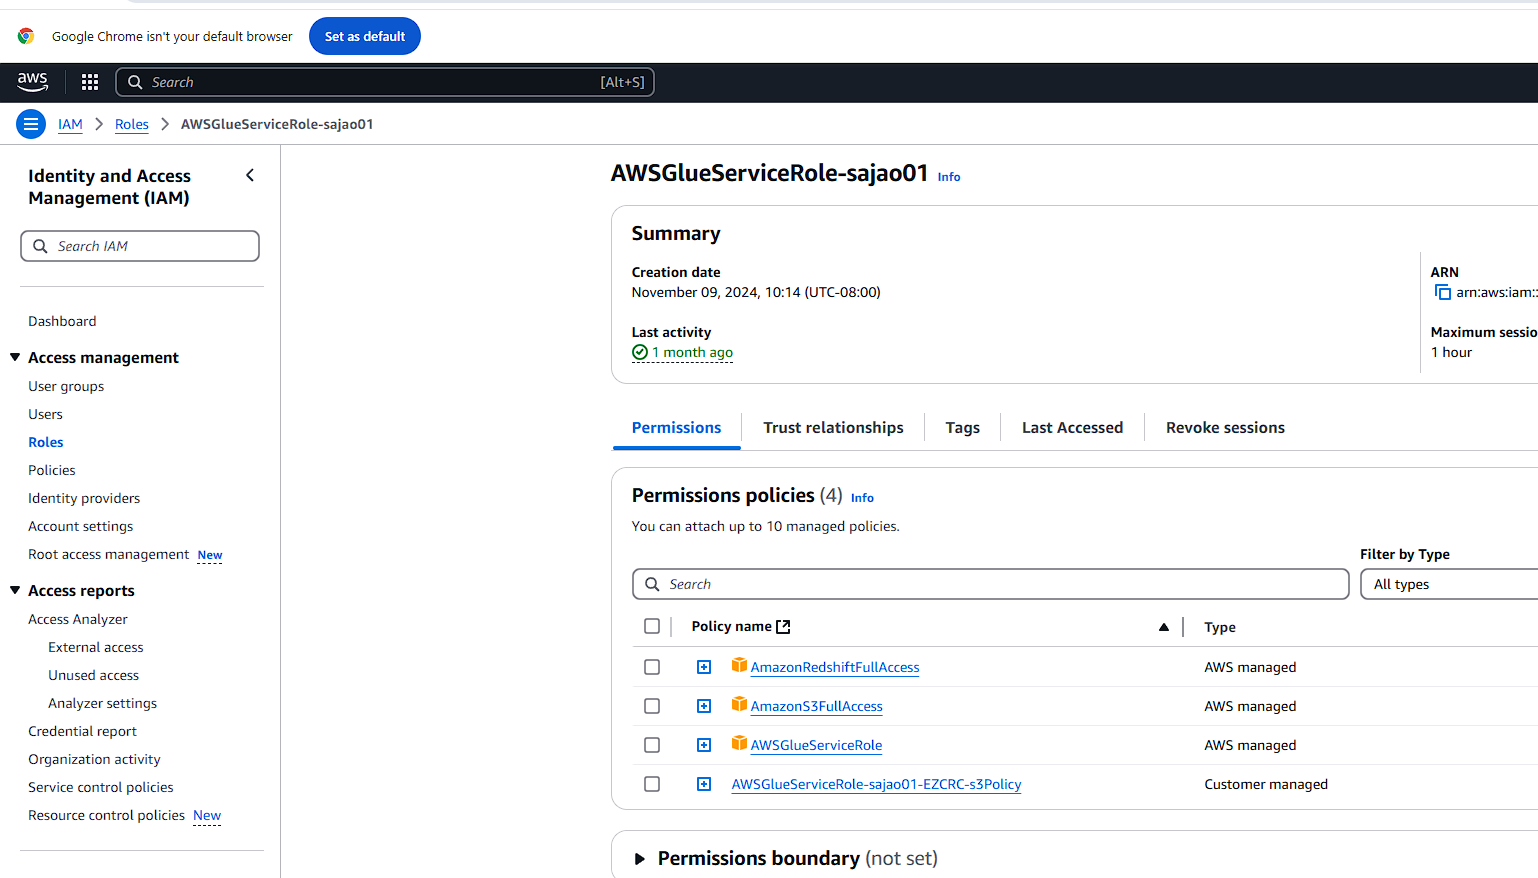

2. **Set Up a Glue Crawler**:
   - Navigate to AWS Glue in the AWS Console.
   - In the left menu, select "Crawlers" and click "Add Crawler."
   - Provide a name for the crawler.
   - Specify the S3 path (e.g., `s3://pt-data-engineering-capstone`) as the data source.
   - Choose the IAM role created earlier.
   - Set a database in the Glue Data Catalog (or create a new one):
     - Under "Add database," enter a name (e.g., `pt-de-capstone-db`) and create it.
   - Configure the crawler to run (e.g., on-demand or scheduled).
   - Finish and run the crawler.


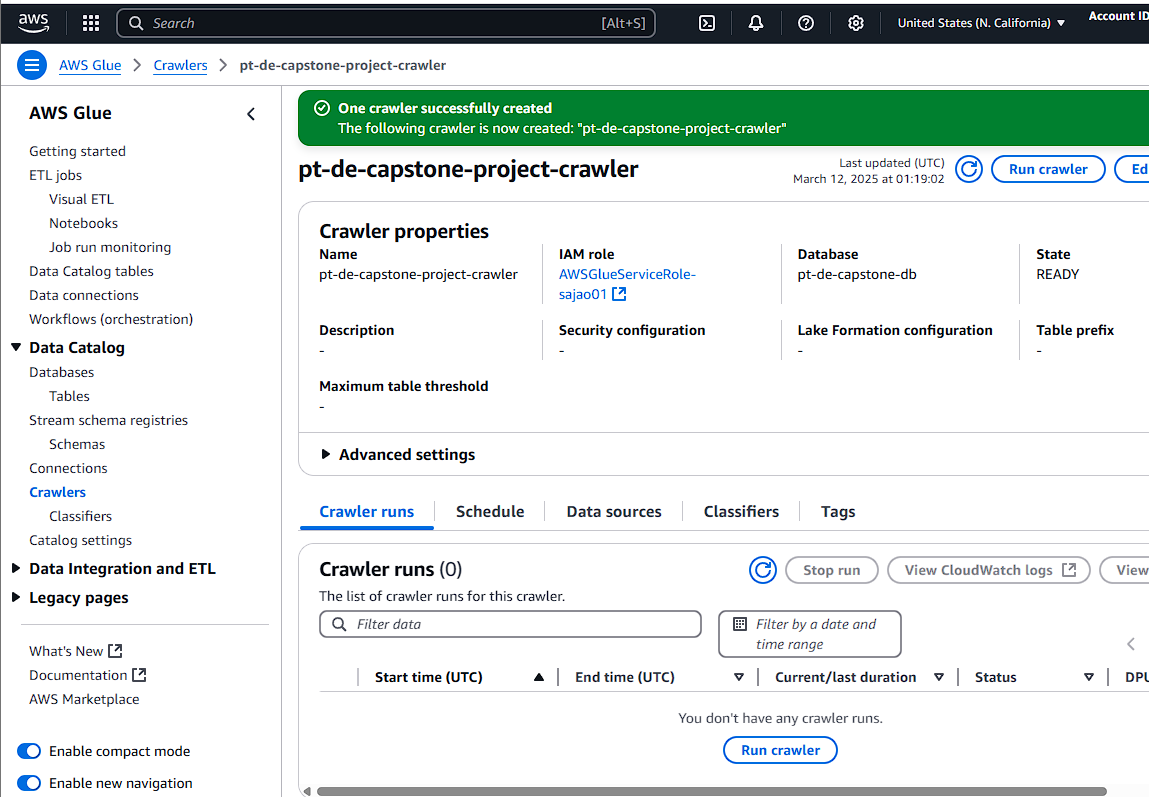

3. **Verify Glue Catalog Tables**:

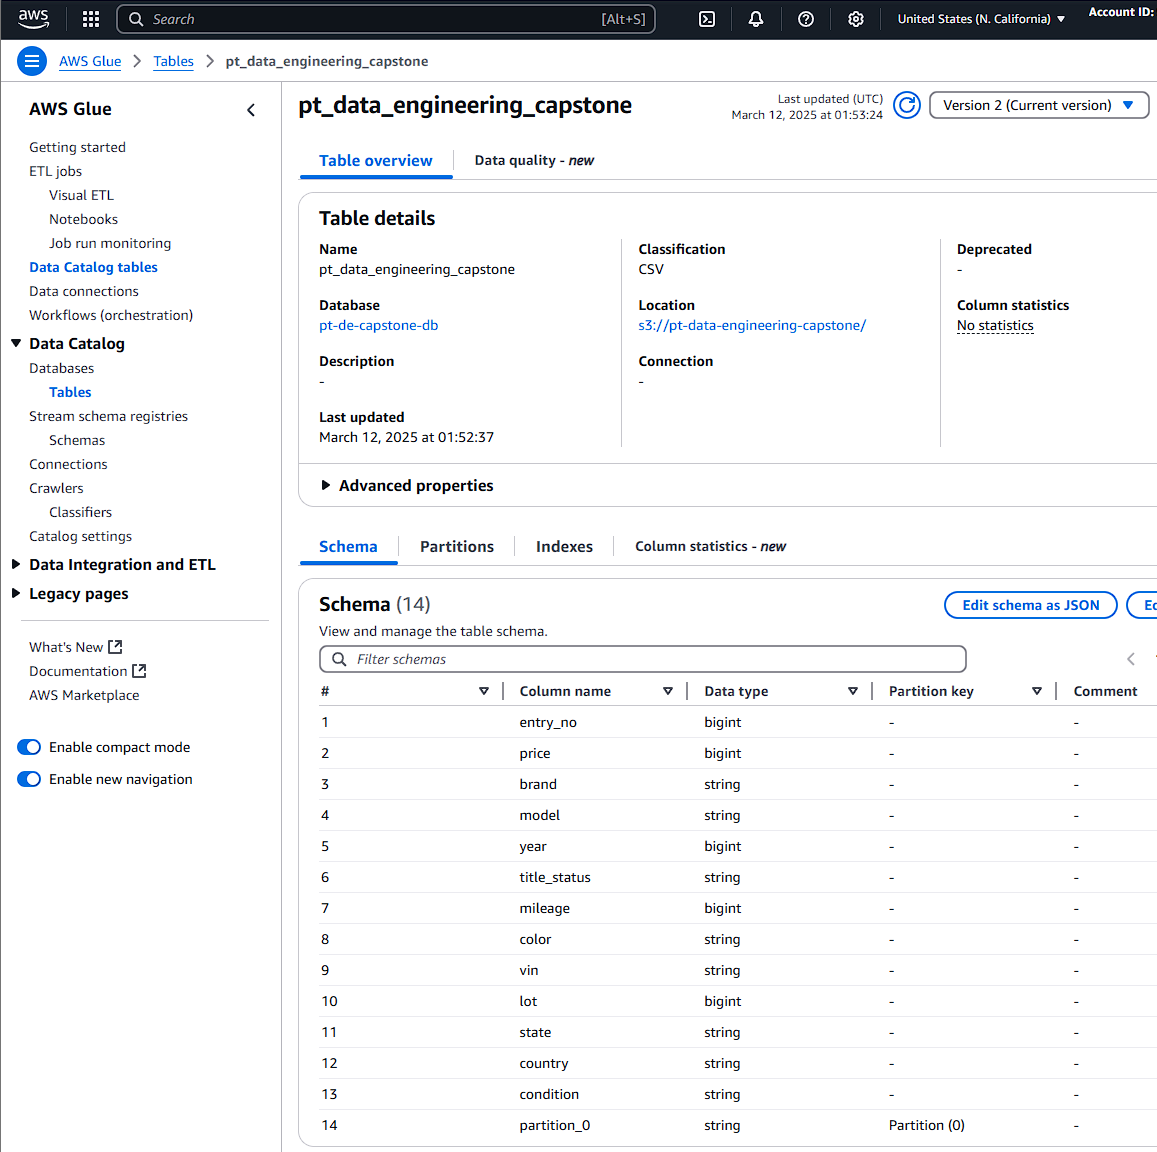

### **Step 3: Set Up Amazon Redshift**

1. **Launch a Redshift Cluster**:

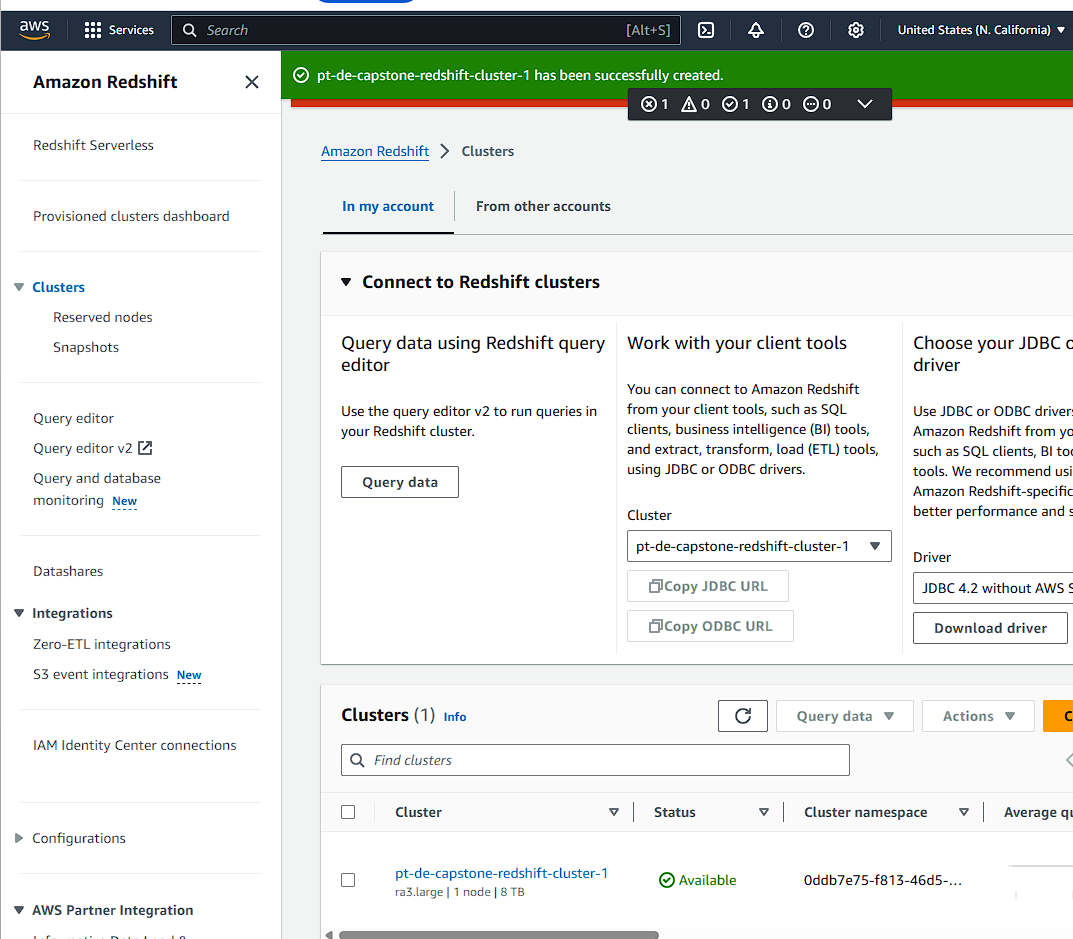

2. **Connect to Redshift Using DBeaver**:

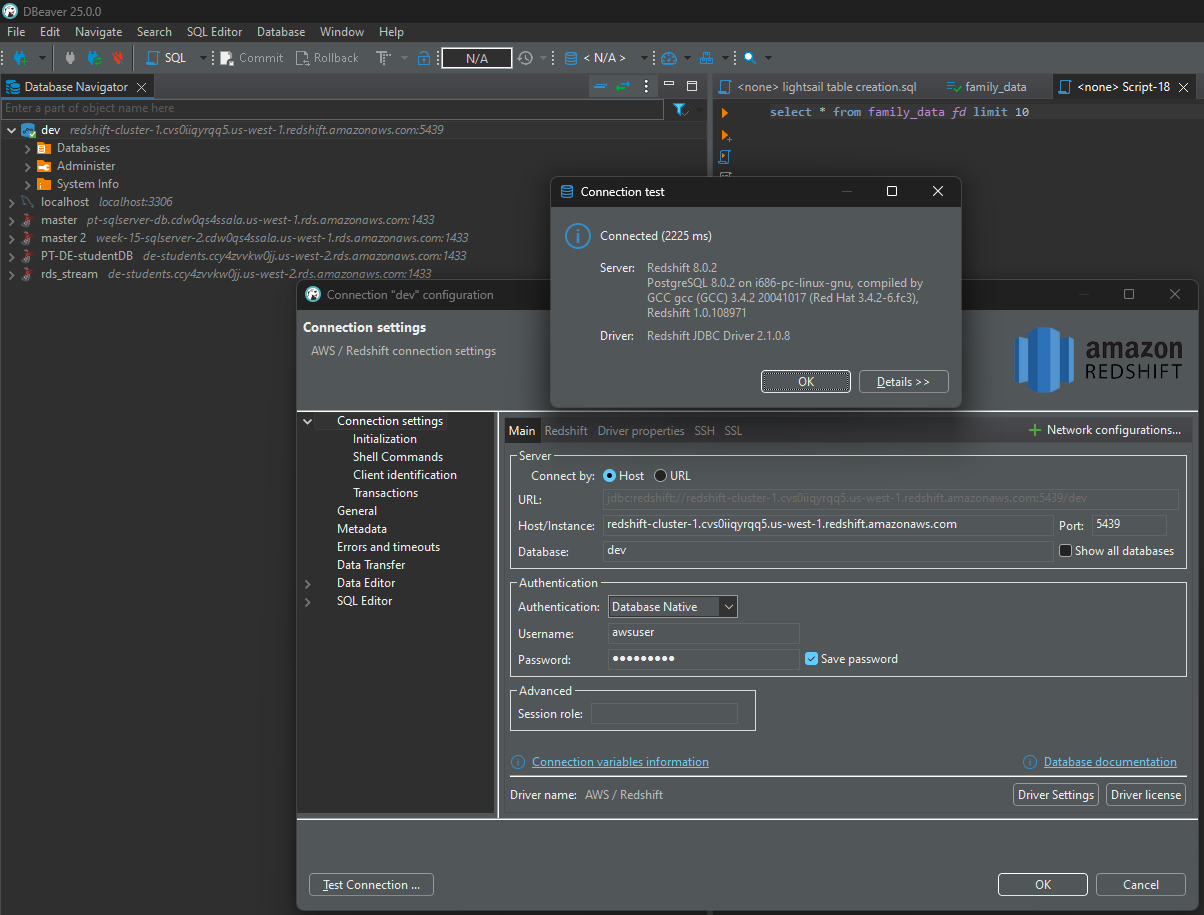

3. **Create a Database**:

    - In DBeaver, run:
     ```
     CREATE DATABASE pt-capstone-redshift-db;
     ```
   - Switch to the new database:
    

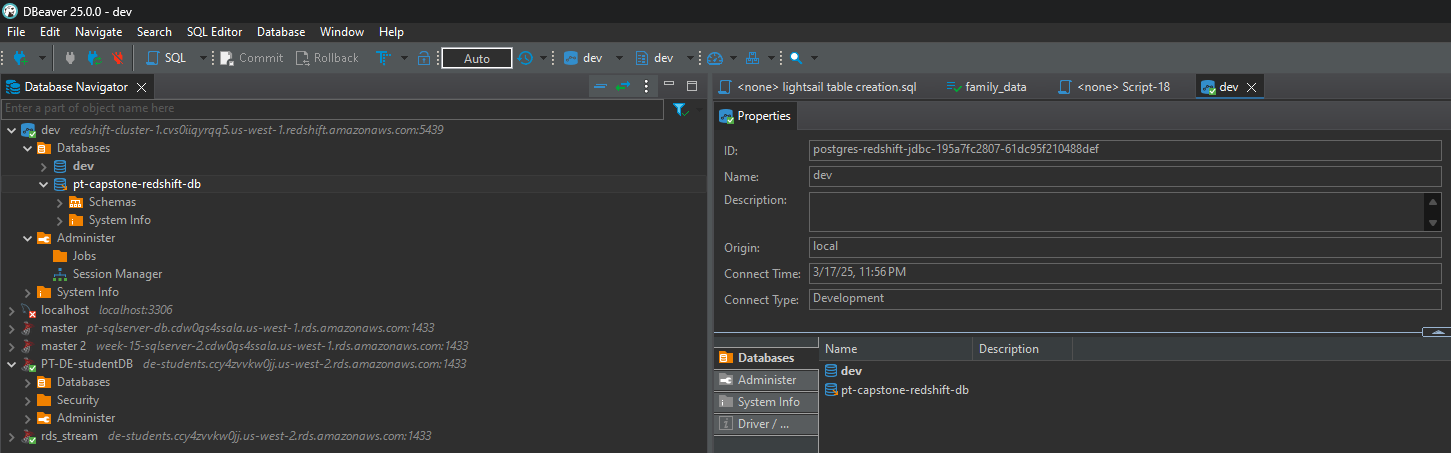

### **Step 4: Integrate Glue with Redshift**
1. **Link Glue Catalog to Redshift**:
   - Redshift can query Glue Data Catalog tables via an external schema.
   - In DBeaver, create an external schema linked to the Glue database:
     ```
     ```sql
     CREATE EXTERNAL SCHEMA glue_schema
     FROM DATA CATALOG
     DATABASE 'my_glue_db'
     IAM_ROLE 'arn:aws:iam::your-account-id:role/your-redshift-role'
     REGION 'your-region';
     ```
   - Replace `your-account-id`, `your-redshift-role`, and `your-region` with appropriate values.
   - Ensure the Redshift IAM role has permissions for Glue and S3 access.
sql


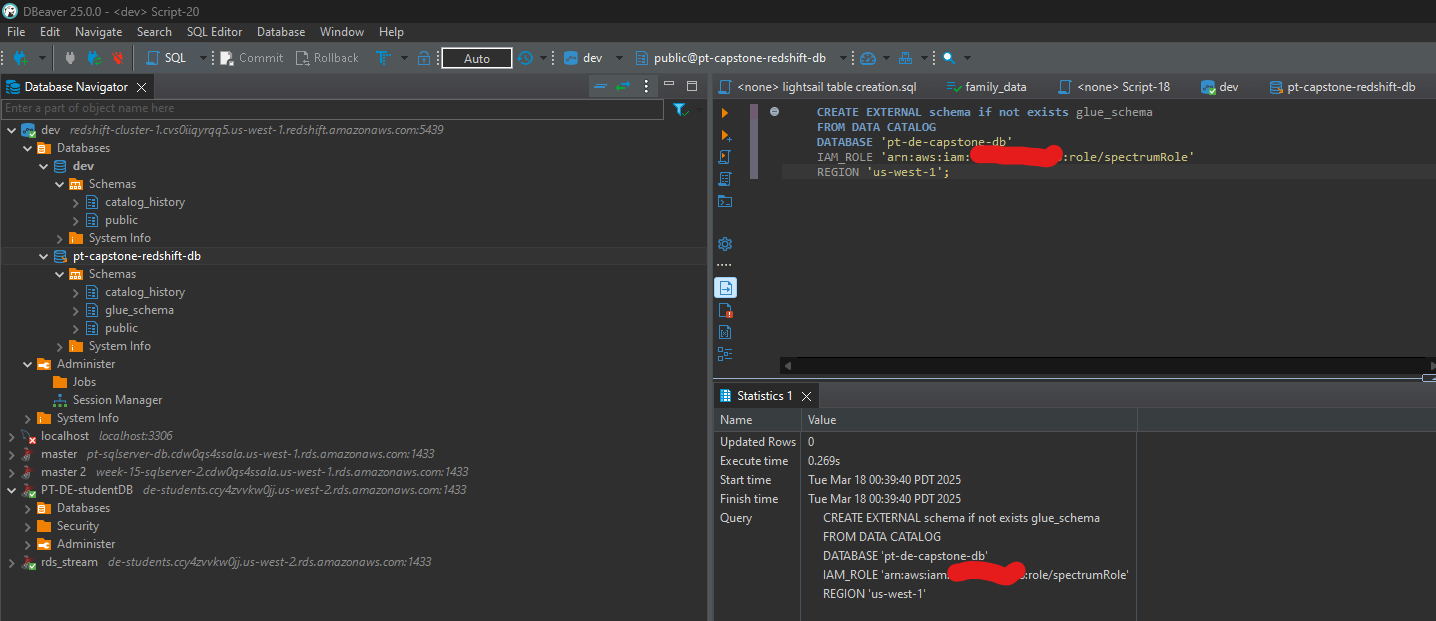

2. **Query External Tables**:
   - The tables crawled by Glue (e.g., `table1`, `table2`) are now accessible in Redshift under `glue_schema`.
   - Run a query to verify:
     ```sql
     SELECT * FROM glue_schema.table1 LIMIT 10;
     ```


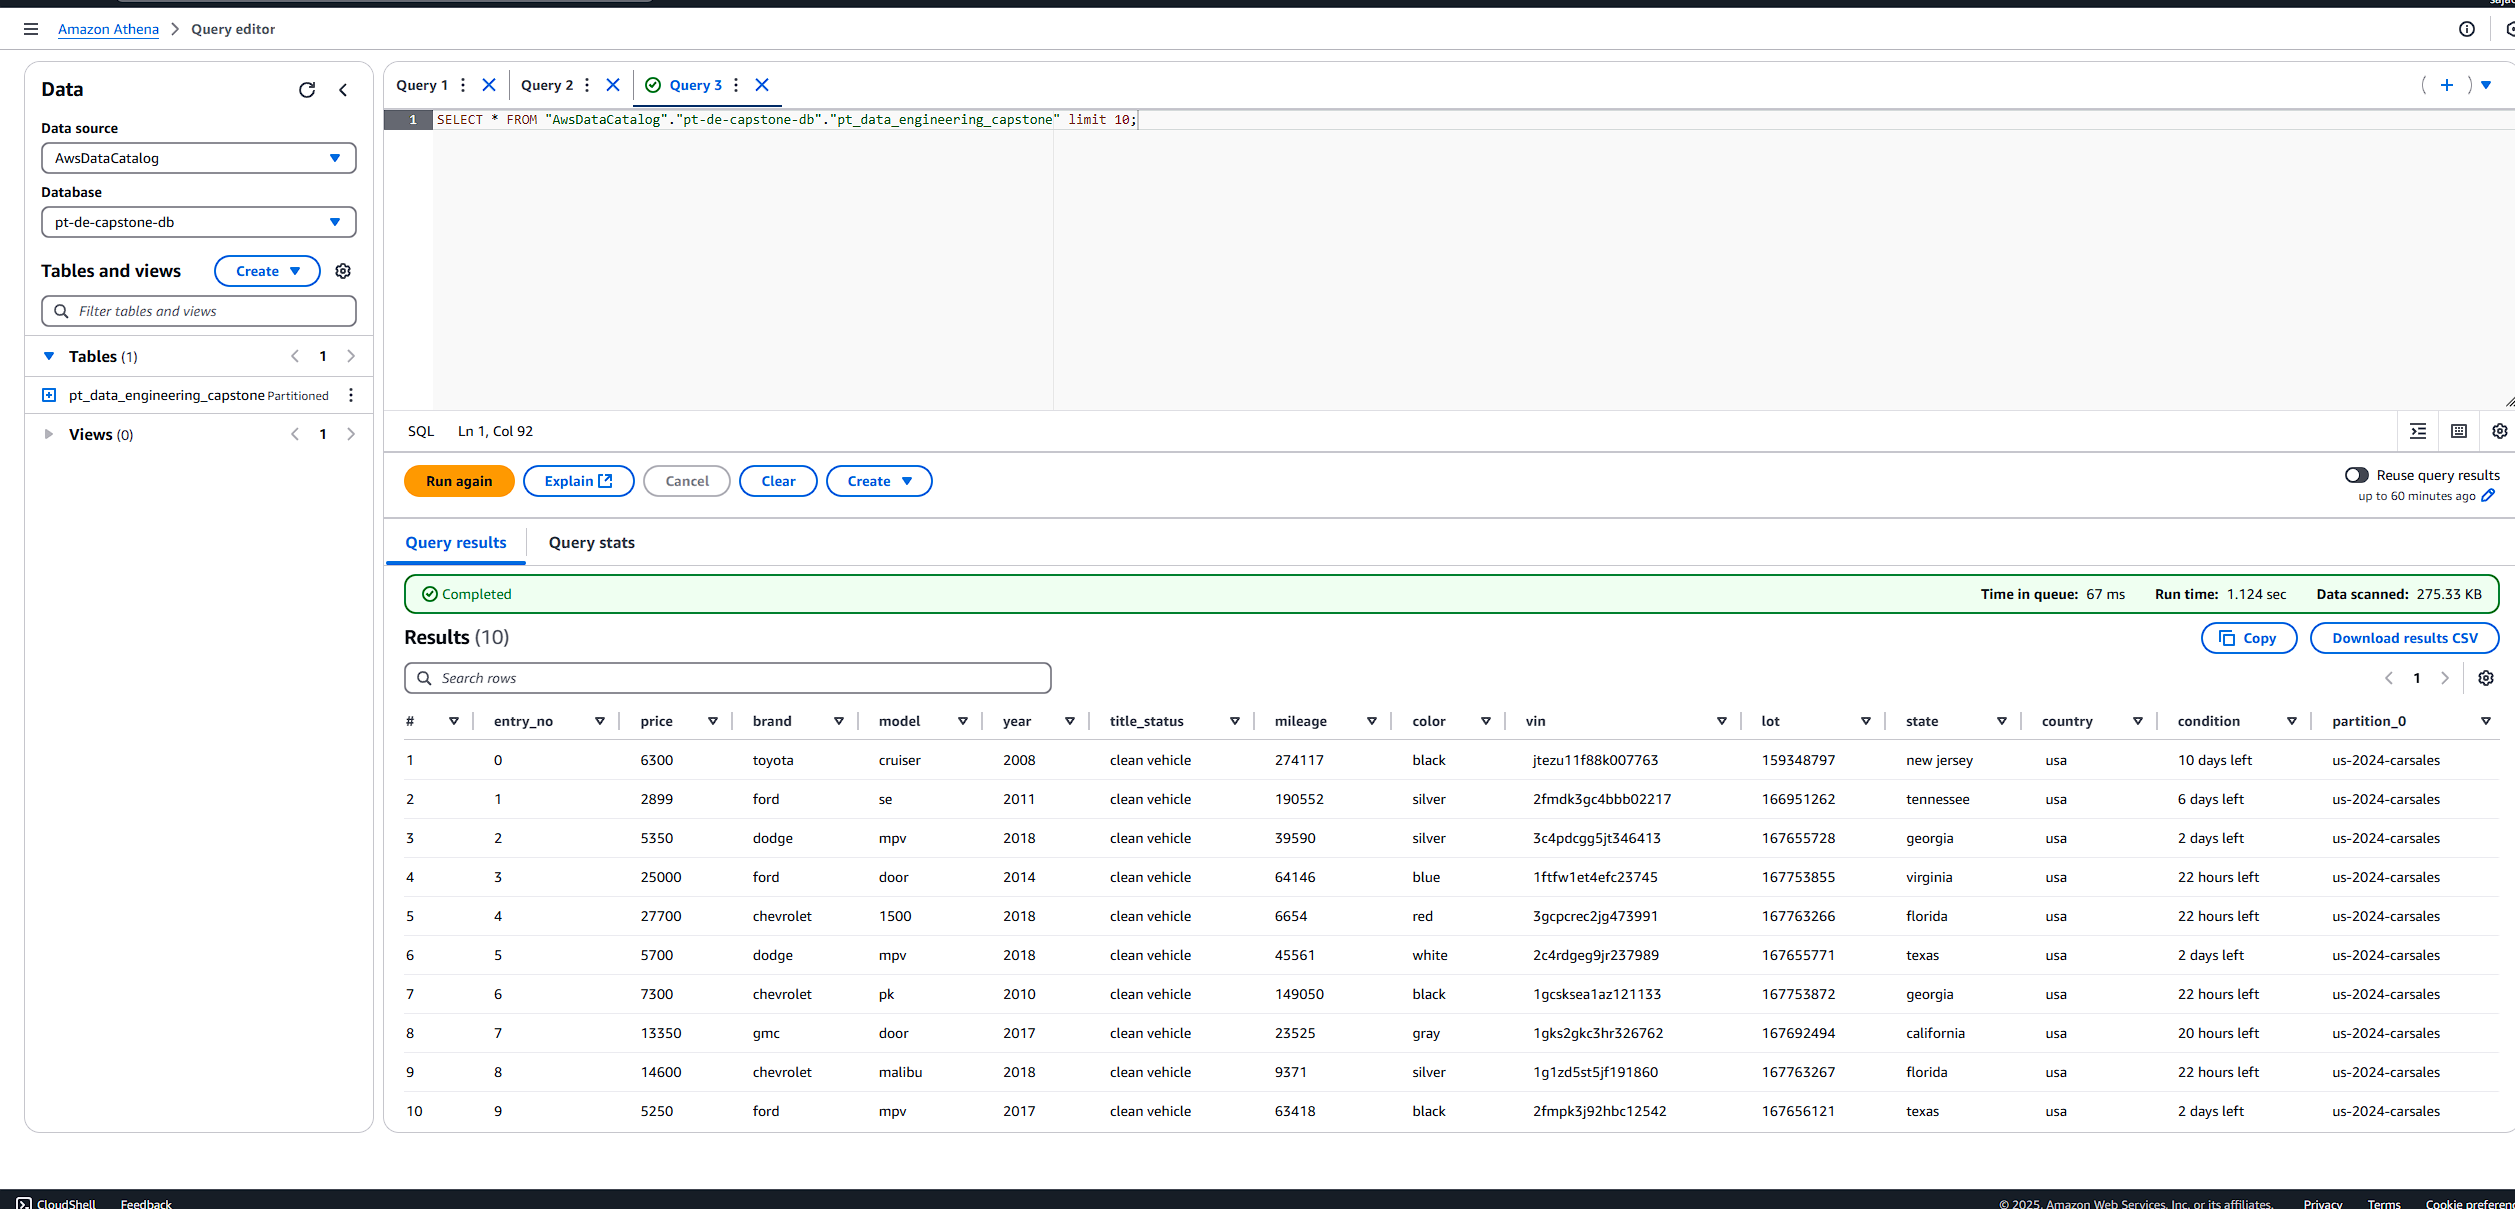

### **Step 5: Create and Load Tables in Redshift**

1. **Create a Table in Redshift**:

EX:
```sql
     CREATE TABLE my_redshift_db.public.sales (
         id INT,
         product VARCHAR(100),
         sales_date DATE,
         amount DECIMAL(10,2)
     );
     ```

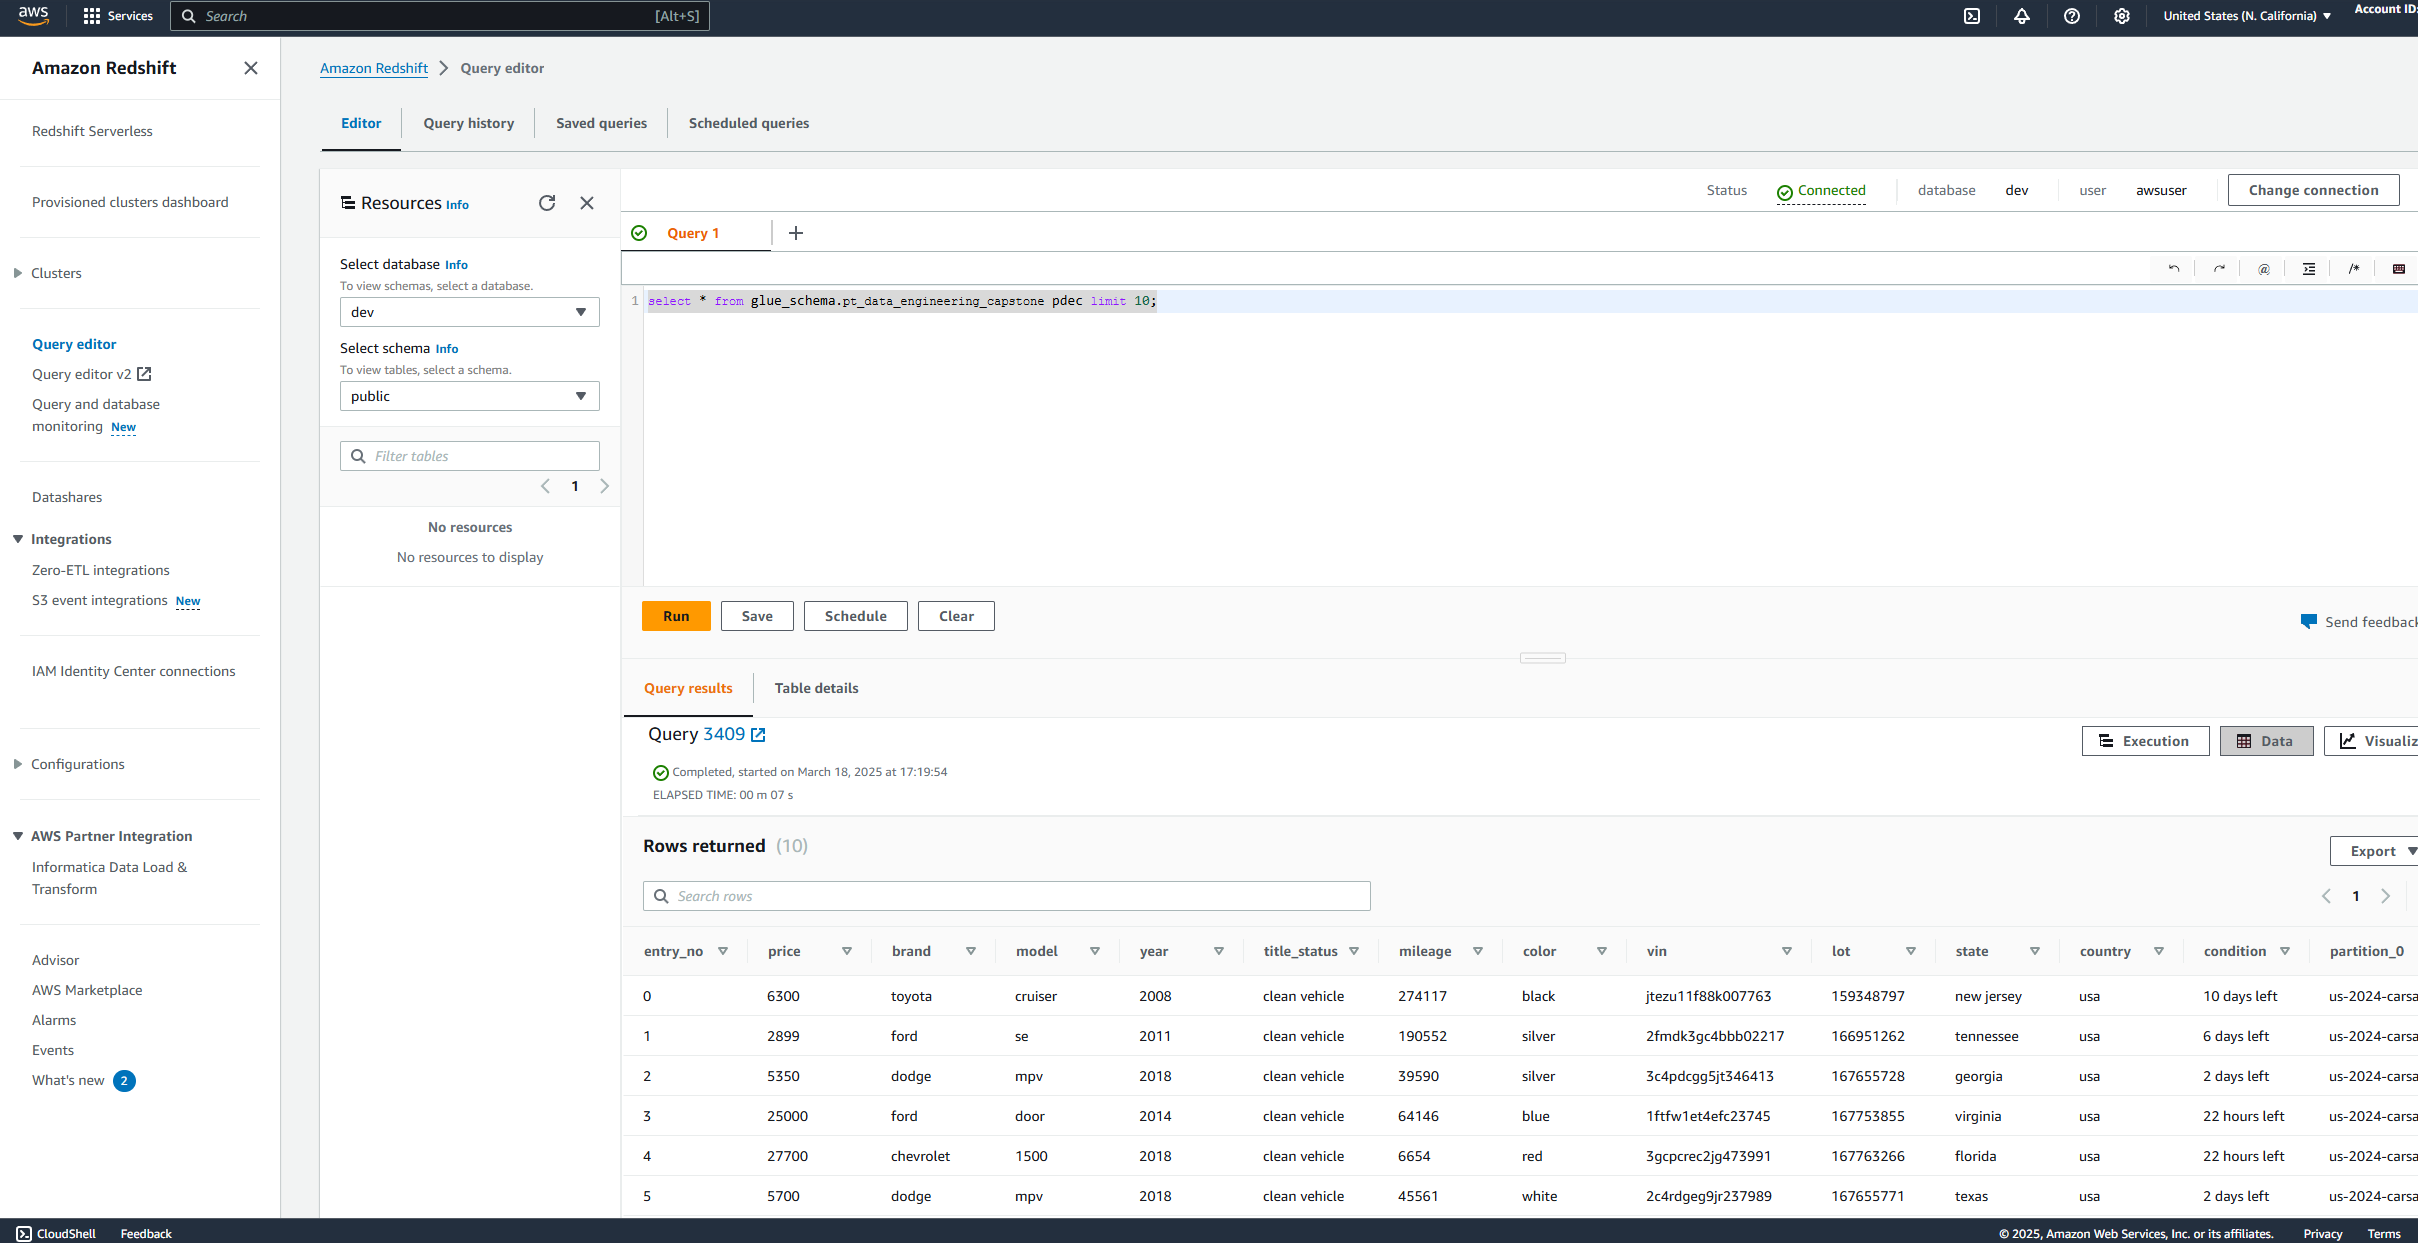

```sql

DROP TABLE IF EXISTS dev.public.dealership_customer;
DROP TABLE IF EXISTS dev.public.vehicle;
DROP TABLE IF EXISTS dev.public.customer;
DROP TABLE IF EXISTS dev.public.employee;
DROP TABLE IF EXISTS dev.public.dealership;
DROP TABLE IF EXISTS dev.public.car_sales;

create TABLE dev.public.dealership (
	dealership_id INT,
	name VARCHAR (256),
	address VARCHAR (128),
	city VARCHAR (128),
	state VARCHAR (64),
	zip VARCHAR (20),
	phone VARCHAR (20)
);

CREATE TABLE dev.public.employee (
	employee_id INT,
	dealership_id INT,
	first_name VARCHAR (128),
	last_name VARCHAR (128),
	phone VARCHAR (20),
	job_title VARCHAR (64)
);

CREATE TABLE dev.public.customer (
	customer_id INT,
	first_name VARCHAR (128),
	last_name VARCHAR (128),
	email VARCHAR (128),
	phone VARCHAR (128),
	address VARCHAR (128),
	city VARCHAR (128) ,
	state VARCHAR (128),
	zip VARCHAR (128)
);

CREATE TABLE dev.public.vehicle (
	vehicle_id INT,
	dealership_id INT,
	customer_id INT,
	vehicle_year INT,
	make VARCHAR (128),
	model VARCHAR (128),
	color VARCHAR (128),
	vehicle_trim VARCHAR (128)
);

CREATE TABLE dev.public.dealership_customer (
	dealership_id INT,
	customer_id INT,
);

CREATE TABLE dev.public.car_sales (
	entry_no INT,
	price INT,
	brand VARCHAR (64),
	model VARCHAR (64),
	year INT,
	title_status VARCHAR (64),
	mileage INT,
	color VARCHAR (64),
	vin VARCHAR (128),
	lot INT,
	state VARCHAR (64),
	country VARCHAR (128),
	condition VARCHAR (64)
);

```

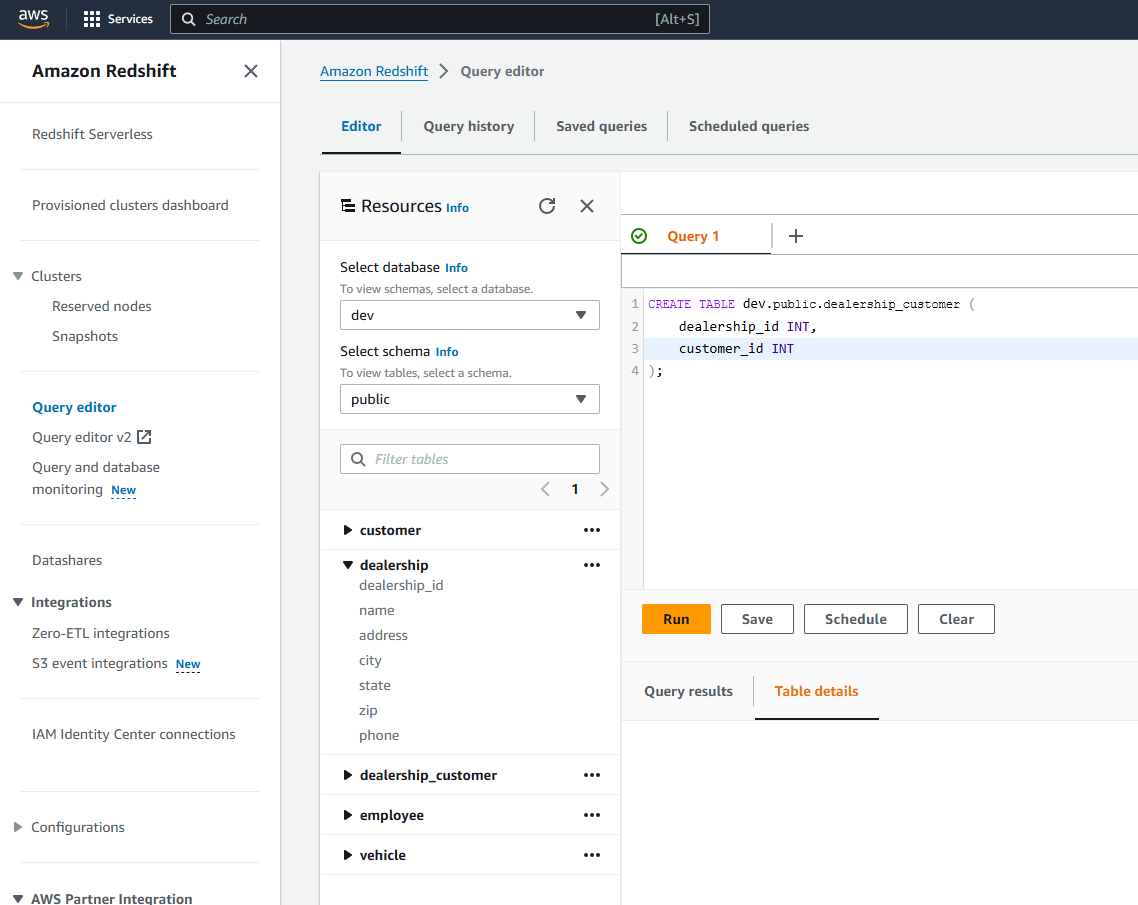

2. **Load Data from S3 into Redshift**:
     ```


```sql

COPY dev.public.car_sales
FROM 's3://pt-data-engineering-capstone/us-2024-carsales/USA_cars_datasets.csv'
IAM_ROLE 'arn:aws:iam::"accountID":role/spectrumRole'
FORMAT AS CSV
DELIMITER ','
IGNOREHEADER 1

```

3. **Verify Data**:

   - Query the table to ensure data loaded correctly:
     ```sql
     SELECT * FROM my_redshift_db.public.sales LIMIT 10;
     ```

---


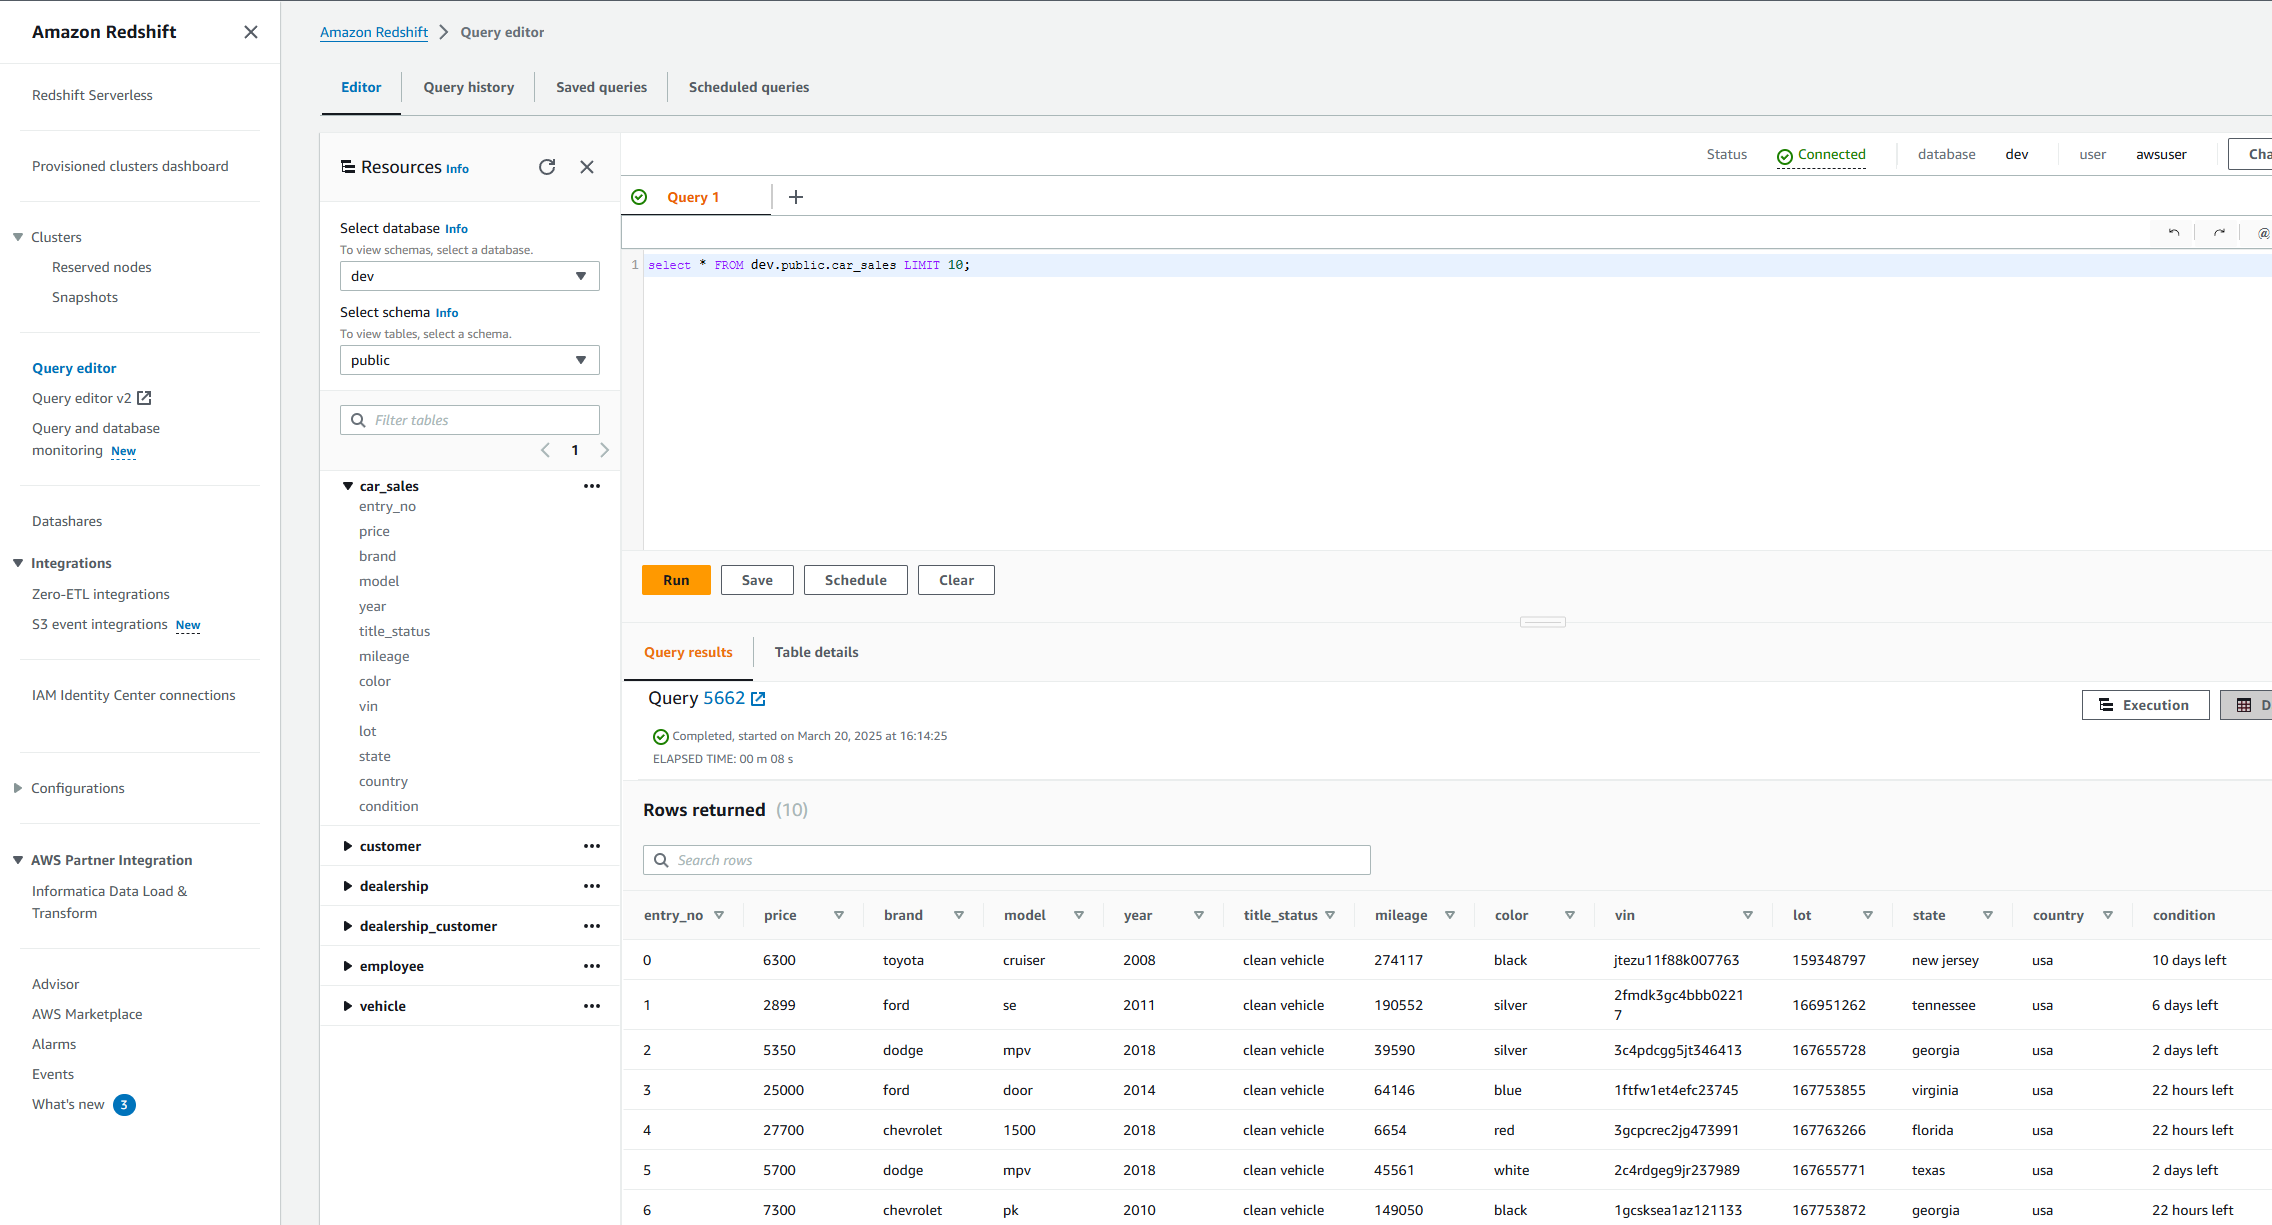

## VISUALIZATION OF CAR SALES BY VEHICLE PRICE (PIE CHART)

1. **Define Price Ranges with SQL**:
   Use a `CASE` statement in Redshift to categorize the `amount` column into ranges. 

   ```sql
   SELECT
       CASE
           WHEN price < 5000 THEN '$0-$5000'
           WHEN price BETWEEN 5000 AND 10000 THEN '$5,000-$10,000'
		   WHEN price BETWEEN 10000 AND 20000 THEN '$10,000-$20,000'
		   WHEN price BETWEEN 20000 AND 30000 THEN '$20,000-$30,000'
		   WHEN price BETWEEN 30000 AND 40000 THEN '$30,000-$40,000'
		   WHEN price BETWEEN 40000 AND 50000 THEN '$40,000-$50,000'
		   WHEN price BETWEEN 50000 AND 60000 THEN '$50,000-$60,000'
		   WHEN price BETWEEN 60000 AND 70000 THEN '$60,000-$70,000'
		   WHEN price BETWEEN 70000 AND 80000 THEN '$70,000-$80,000'
           WHEN price BETWEEN 80000 AND 90000 THEN '$80,000-$90,000'
		   WHEN price BETWEEN 90000 AND 100000 THEN '$90,000-$100,000'
           WHEN price >= 100000 THEN '$100,000+'
       END AS price_range,
       COUNT(*) AS sales_count,
       SUM(price) AS total_sales
   FROM dev.public.car_sales
   GROUP BY 1
   ORDER BY price_range;
   ```

2. **Run the Query**:

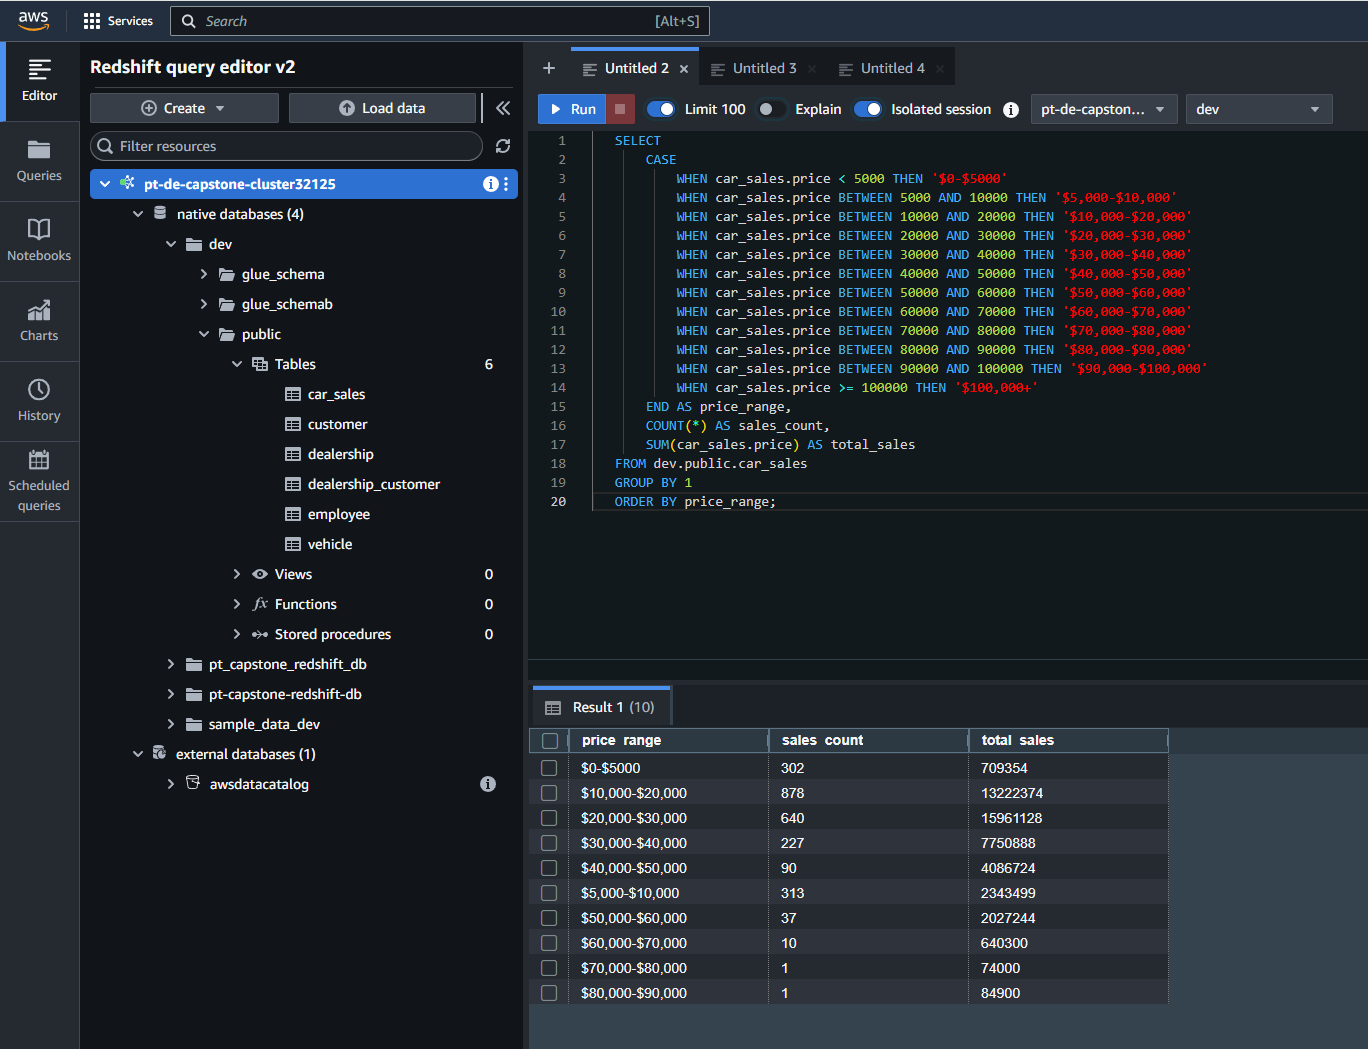

2. **Using Redshift Chart Visualization Tool**

   - After running the query, click the "Chart" option, select "Line Graph," and map `price_range` to the labels and `sales_count` or `total_sales` to the values.

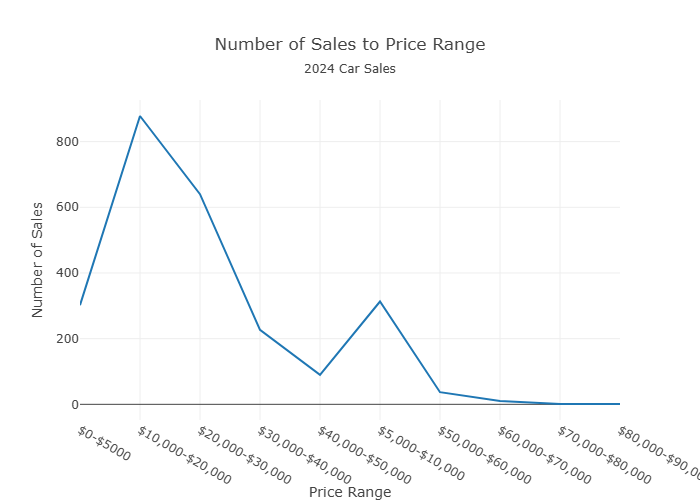

- Pie Chart

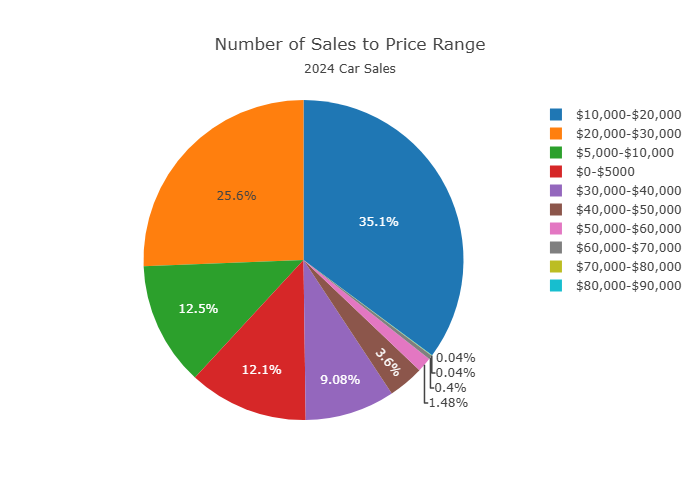